In [1]:
import pandas as pd

In [3]:
file_path = "Instagram_Analytics.xlsx" 
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Instagram Profile Overview', 'Instagram Post Engagement', 'Instagram Age Gender Demographi', 'Instagram Top Cities Regions', 'SupermetricsQueries']


In [5]:
dfs = pd.read_excel(xls, sheet_name=None)

In [7]:
# Read each sheet into separate DataFrames
profile_overview = pd.read_excel(xls, sheet_name="Instagram Profile Overview")
post_engagement = pd.read_excel(xls, sheet_name="Instagram Post Engagement")
age_gender = pd.read_excel(xls, sheet_name="Instagram Age Gender Demographi")
top_cities = pd.read_excel(xls, sheet_name="Instagram Top Cities Regions")

# Displaying first five rows of each dataset
print(profile_overview.head())
print(post_engagement.head())
print(age_gender.head())
print(top_cities.head())

        Date  Profile impressions  Shares  Engagement  Profile visits  \
0 2025-03-02                   83       0           0               0   
1 2025-03-01                  109       0           0               0   
2 2025-02-28                  108       0           0               0   
3 2025-02-27                   82       0           0               0   
4 2025-02-26                   88       0           0               0   

   Profile reach  Reel shares  New followers  \
0             71            0            0.0   
1             82            0            0.0   
2             59            0            0.0   
3             45            0           19.0   
4             49            0            3.0   

                                             RowHash  
0  55f2240d75506aea662053ed9adc6bd9cf1c6260073aac...  
1  09bb917c7fbc3422e044813ba2982c54e551815df00322...  
2  225a205709a1df025548f1d46a88e97d473b8c10c62588...  
3  fdc3b58749c9d80ef81a8d980e49b5dae70dbb324031b1...

In [9]:
# Checking for missing values
print(profile_overview.isnull().sum())
print(post_engagement.isnull().sum())



Date                     0
Profile impressions      0
Shares                   0
Engagement               0
Profile visits           0
Profile reach            0
Reel shares              0
New followers          340
RowHash                  6
dtype: int64
Date                  0
Media ID              0
Media caption         0
Media product type    0
Media impressions     0
Media reach           0
Like count            0
Comments count        0
Shares                0
Unique saves          0
Video views           0
RowHash               0
dtype: int64


In [11]:
duplicate_rows = profile_overview.duplicated(subset=['RowHash'], keep=False)  # Shows all duplicates
print(f"Total Duplicate Rows: {duplicate_rows.sum()}")

Total Duplicate Rows: 6


In [13]:
profile_overview.drop_duplicates(subset=['RowHash'], keep='first', inplace=True)

In [15]:
print(f"Remaining Duplicates: {profile_overview.duplicated(subset=['RowHash']).sum()}")

Remaining Duplicates: 0


In [17]:
# Check for missing values again
print(profile_overview.isnull().sum())
print(post_engagement.isnull().sum())
print(age_gender.isnull().sum())
print(top_cities.isnull().sum())


Date                     0
Profile impressions      0
Shares                   0
Engagement               0
Profile visits           0
Profile reach            0
Reel shares              0
New followers          335
RowHash                  1
dtype: int64
Date                  0
Media ID              0
Media caption         0
Media product type    0
Media impressions     0
Media reach           0
Like count            0
Comments count        0
Shares                0
Unique saves          0
Video views           0
RowHash               0
dtype: int64
Gender               0
Age                  0
Profile followers    0
RowHash              0
dtype: int64
City                 0
Area & city          0
Area                 0
Profile followers    0
RowHash              0
dtype: int64


In [19]:
# Droping 'RowHash' columns as they are not useful for analysis
profile_overview.drop(columns=['RowHash'], inplace=True)
post_engagement.drop(columns=['RowHash'], inplace=True)
age_gender.drop(columns=['RowHash'], inplace=True)
top_cities.drop(columns=['RowHash'], inplace=True)

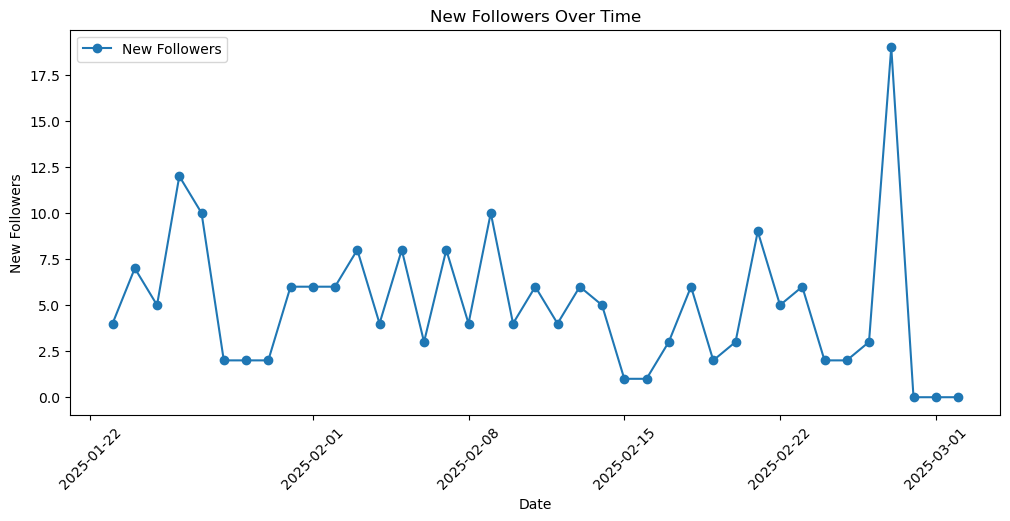

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(profile_overview['Date'], profile_overview['New followers'], marker='o', linestyle='-', label='New Followers')
plt.title("New Followers Over Time")
plt.xlabel("Date")
plt.ylabel("New Followers")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.dtypes)  # Check if 'Date' is now in datetime format
print(df.head())  # Show the first few rows

In [194]:
profile_overview['New followers'] = profile_overview['New followers'].fillna(0)

In [196]:
print(profile_overview.isnull().sum()) 

Date                   0
Profile impressions    0
Shares                 0
Engagement             0
Profile visits         0
Profile reach          0
Reel shares            0
New followers          0
Growth Rate            0
dtype: int64


In [33]:
print(profile_overview.dtypes)

Date                   datetime64[ns]
Profile impressions             int64
Shares                          int64
Engagement                      int64
Profile visits                  int64
Profile reach                   int64
Reel shares                     int64
New followers                 float64
dtype: object


In [198]:
# Define output file name
output_file = "cleaned_instagram_analytics.xlsx"

# Save all cleaned sheets into a single workbook
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    profile_overview.to_excel(writer, sheet_name="Instagram Profile Overview", index=False)
    post_engagement.to_excel(writer, sheet_name="Instagram Post Engagement", index=False)
    age_gender.to_excel(writer, sheet_name="Instagram Age Gender Demographi", index=False)
    top_cities.to_excel(writer, sheet_name="Instagram Top Cities Regions", index=False)

print(f"Cleaned workbook saved as: {output_file}")

Cleaned workbook saved as: cleaned_instagram_analytics.xlsx


In [200]:
# Engagement Rate (Post-Level)
post_engagement["Engagement Rate"] = (
    (post_engagement["Like count"] + post_engagement["Comments count"] + post_engagement["Shares"])
    / post_engagement["Media reach"]
)
print(post_engagement["Engagement Rate"])

0     0.023342
1     0.014388
2     0.022809
3     0.032031
4     0.019920
        ...   
56    0.071204
57    0.056164
58    0.041525
59    0.043664
60    0.016371
Name: Engagement Rate, Length: 61, dtype: float64


In [192]:
#  Interaction Rate (Post-Level)
post_engagement["Interaction Rate"] = (
    (post_engagement["Like count"] + post_engagement["Comments count"]) / post_engagement["Media impressions"]
)
print(post_engagement["Interaction Rate"])

0     0.020737
1     0.013495
2     0.020868
3          inf
4          inf
        ...   
56    0.066667
57    0.053195
58    0.041350
59         inf
60    0.015464
Name: Interaction Rate, Length: 61, dtype: float64


In [66]:
# Profile Growth Rate (Account-Level)
profile_overview["Growth Rate"] = profile_overview["New followers"] / profile_overview["Profile reach"]


In [68]:
# Top-Performing Post (Highest Engagement)
top_post = post_engagement.sort_values(by="Engagement Rate", ascending=False).head(1)
print("Top Performing Post:\n", top_post)

Top Performing Post:
          Date           Media ID  \
32 2024-11-12  18024479765446917   

                                        Media caption Media product type  \
32  When I was a kid and my parents got divorced, ...               FEED   

    Media impressions  Media reach  Like count  Comments count  Shares  \
32               5276         4684         262             114       0   

    Unique saves  Video views  Engagement Rate  Interaction Rate  
32           106            0         0.080273          0.071266  


In [70]:
# Audience Demographics (Age & Gender Distribution)
age_gender_summary = age_gender.groupby("Age")["Profile followers"].sum().reset_index()
print(age_gender_summary)


     Age  Profile followers
0  13-17                 37
1  18-24                115
2  25-34               2503
3  35-44               7332
4  45-54               2150
5  55-64                163
6    65+                147


In [72]:
# Save the cleaned datasets with calculated metrics
profile_overview.to_csv("cleaned_profile_overview.csv", index=False)
post_engagement.to_csv("cleaned_post_engagement.csv", index=False)
age_gender.to_csv("cleaned_age_gender.csv", index=False)
top_cities.to_csv("cleaned_top_cities.csv", index=False)

print("Metrics calculated and saved successfully!")

Metrics calculated and saved successfully!


In [74]:
xls

In [76]:
dfs

{'Instagram Profile Overview':           Date  Profile impressions  Shares  Engagement  Profile visits  \
 0   2025-03-02                   83       0           0               0   
 1   2025-03-01                  109       0           0               0   
 2   2025-02-28                  108       0           0               0   
 3   2025-02-27                   82       0           0               0   
 4   2025-02-26                   88       0           0               0   
 ..         ...                  ...     ...         ...             ...   
 374 2024-02-22                 6961       0         114               3   
 375 2024-02-21                 7122       3         149               2   
 376 2024-02-20                 8570       1         268              17   
 377 2024-02-19                 7939       0         186               1   
 378 2024-02-18                10036       7         582               8   
 
      Profile reach  Reel shares  New followers  \
 0   

In [80]:
df = pd.read_csv(r"C:\Users\yuvas\OneDrive\Desktop\Instagram comments.csv")

In [82]:
df

,Date,Media ID,Media caption,Media product type,Media impressions,Media reach,Like count,Comments count,Shares,Unique saves,Video views,RowHash
0,19-01-2025,1.790220e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...
1,18-01-2025,1.807121e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,741,695,8,2,0,1,0,55102c6de8e1a68e015c44e3c8a600d06088fa042c29d0...
2,17-01-2025,1.802762e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,1821,1666,24,14,0,13,0,68123274789468c3beb60c484c03735b62f4046cd452f3...
3,16-01-2025,1.803459e+16,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,1280,13,27,1,5,0,905354b956819e1cf3738a4541695cc1659b19fa2e7223...
4,15-01-2025,1.801221e+16,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,753,6,8,1,2,0,48a803f148ba92cef3d43ac7944ce9bb44ffe97486927a...
...,...,...,...,...,...,...,...,...,...,...,...,...
56,09-08-2024,1.834782e+16,Tears ran down my face as I dropped my son off...,FEED,2040,1910,32,104,0,13,0,1e619a202f708d84dd4a2a150b89b4600d4893237268e3...
57,08-08-2024,1.805092e+16,If you snap at your child because you're stres...,FEED,2989,2831,157,2,0,78,0,04bc7ef29acf5ea0e1f8e35d4cfa6130df531b5996cfac...
58,06-08-2024,1.805084e+16,Reminder:\n\nNo matter what your marital statu...,FEED,1185,1180,49,0,0,4,0,67411b49f4479010fafce759e5342bf458a04200c50490...
59,05-08-2024,1.790520e+16,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...


In [84]:
df.columns

Index(['Date', 'Media ID', 'Media caption', 'Media product type',
       'Media impressions', 'Media reach', 'Like count', 'Comments count',
       'Shares', 'Unique saves', 'Video views', 'RowHash'],
      dtype='object')

In [90]:
def extract_hashtags(text):  
     return re.findall(r'#\w+', text)  

In [88]:
 import re 

In [92]:
df['hashtags'] = df['Media caption'].fillna('').apply(extract_hashtags)

In [100]:
df['hashtags'].iloc[0]

['#singlemums',
 '#singlemumsuk',
 '#singlemumuk',
 '#singlemumlife',
 '#solomums',
 '#singlemomlife',
 '#singlemoms',
 '#singlemother',
 '#coparenting',
 '#singleparents',
 '#singleparenting',
 '#divorcedparents',
 '#divorcedmum',
 '#divorcedmom',
 '#lifeafterdivorce',
 '#divorce',
 '#divorcecoach',
 '#divorcecommunity',
 '#divorcewithkids',
 '#supportingchrildrenthroughdivorce',
 '#separationwithkids',
 '#childcentereddivorce',
 '#parentinganddivorce',
 '#parentingduringdivorce',
 '#mumanxiety',
 '#parentingguide',
 '#mumguilt',
 '#mumguiltisreal']

In [102]:
df_exploded = df.explode('hashtags')

In [114]:
df_exploded

,Date,Media ID,Media caption,Media product type,Media impressions,Media reach,Like count,Comments count,Shares,Unique saves,Video views,RowHash,hashtags
0,19-01-2025,1.790220e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemums
0,19-01-2025,1.790220e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumsuk
0,19-01-2025,1.790220e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumuk
0,19-01-2025,1.790220e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumlife
0,19-01-2025,1.790220e+16,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#solomums
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,05-08-2024,1.790520e+16,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...,#mumguilt
59,05-08-2024,1.790520e+16,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...,#mumguiltisreal
60,04-08-2024,1.804713e+16,It can be really hard when our kids start to t...,FEED,776,733,12,0,0,3,0,178f09212ab31eaca05a616b8bf61b8e3c8c7bba0419f5...,#mumanxiety
60,04-08-2024,1.804713e+16,It can be really hard when our kids start to t...,FEED,776,733,12,0,0,3,0,178f09212ab31eaca05a616b8bf61b8e3c8c7bba0419f5...,#mumguilt


In [122]:
df1 = df_exploded[df_exploded["Media ID"] == "17902204887015248"]

In [124]:
df1.shape

(28, 13)

In [116]:
df_exploded['Media ID'] = df_exploded['Media ID'].apply(lambda x: f"{int(x)}")

In [118]:
df_exploded

,Date,Media ID,Media caption,Media product type,Media impressions,Media reach,Like count,Comments count,Shares,Unique saves,Video views,RowHash,hashtags
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemums
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumsuk
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumuk
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumlife
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#solomums
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,05-08-2024,17905200000000000,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...,#mumguilt
59,05-08-2024,17905200000000000,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...,#mumguiltisreal
60,04-08-2024,18047131999889356,It can be really hard when our kids start to t...,FEED,776,733,12,0,0,3,0,178f09212ab31eaca05a616b8bf61b8e3c8c7bba0419f5...,#mumanxiety
60,04-08-2024,18047131999889356,It can be really hard when our kids start to t...,FEED,776,733,12,0,0,3,0,178f09212ab31eaca05a616b8bf61b8e3c8c7bba0419f5...,#mumguilt


In [ ]:
 # Group by hashtag and compute the required metrics:  
 hashtag_stats = df_exploded.groupby('hashtags').agg(  
     total_impressions=('impressions', 'sum'),  
     total_engagement=('engagement', 'sum'),  
     post_count=('hashtags', 'count')  
 ).reset_index()  
   
 # Calculate the engagement rate as total engagement divided by total impressions  
 hashtag_stats['engagement_rate'] = hashtag_stats['total_engagement'] / hashtag_stats['total_impressions']  
   
 # Display the resulting statistics  
 print('Hashtag Statistics:')  

In [108]:
1.7902204887015248e+16

1.7902204887015248e+16

In [110]:
df_exploded.dtypes

Date                   object
Media ID              float64
Media caption          object
Media product type     object
Media impressions       int64
Media reach             int64
Like count              int64
Comments count          int64
Shares                  int64
Unique saves            int64
Video views             int64
RowHash                object
hashtags               object
dtype: object

In [126]:
df_exploded

,Date,Media ID,Media caption,Media product type,Media impressions,Media reach,Like count,Comments count,Shares,Unique saves,Video views,RowHash,hashtags
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemums
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumsuk
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumuk
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#singlemumlife
0,19-01-2025,17902204887015248,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,673eb16a83d01ab25bd18d6511109e6f7205935760ece8...,#solomums
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,05-08-2024,17905200000000000,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...,#mumguilt
59,05-08-2024,17905200000000000,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,2f1aae84de4a164aabea086fe509c9d48e1e9829c59df4...,#mumguiltisreal
60,04-08-2024,18047131999889356,It can be really hard when our kids start to t...,FEED,776,733,12,0,0,3,0,178f09212ab31eaca05a616b8bf61b8e3c8c7bba0419f5...,#mumanxiety
60,04-08-2024,18047131999889356,It can be really hard when our kids start to t...,FEED,776,733,12,0,0,3,0,178f09212ab31eaca05a616b8bf61b8e3c8c7bba0419f5...,#mumguilt


In [ ]:
hashtag_stats = df_exploded.groupby('hashtags').agg(  
     total_impressions=('impressions', 'sum'),  
     total_engagement=('engagement', 'sum'),  
     post_count=('hashtags', 'count')  
 ).reset_index()

In [128]:
post_engagement

,Date,Media ID,Media caption,Media product type,Media impressions,Media reach,Like count,Comments count,Shares,Unique saves,Video views,Engagement Rate,Interaction Rate
0,2025-01-19,17902204887015249,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,868,814,10,8,1,2,0,0.023342,0.020737
1,2025-01-18,18071205646706820,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,741,695,8,2,0,1,0,0.014388,0.013495
2,2025-01-17,18027615518313508,Comment ‘CLASS’ to sign up to my free mastercl...,FEED,1821,1666,24,14,0,13,0,0.022809,0.020868
3,2025-01-16,18034591967437473,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,1280,13,27,1,5,0,0.032031,inf
4,2025-01-15,18012211340694193,Comment ‘CLASS’ to sign up to my free mastercl...,REELS,0,753,6,8,1,2,0,0.019920,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-08-09,18347817988138734,Tears ran down my face as I dropped my son off...,FEED,2040,1910,32,104,0,13,0,0.071204,0.066667
57,2024-08-08,18050919739826668,If you snap at your child because you're stres...,FEED,2989,2831,157,2,0,78,0,0.056164,0.053195
58,2024-08-06,18050838700839210,Reminder:\n\nNo matter what your marital statu...,FEED,1185,1180,49,0,0,4,0,0.041525,0.041350
59,2024-08-05,17905245740928500,Comment ‘GUIDE’ for my free guide on how to he...,REELS,0,3504,116,35,2,65,0,0.043664,inf


In [130]:
post_engagement['hashtags'] = post_engagement['Media caption'].fillna('').apply(extract_hashtags)

In [132]:
post_engagement.columns

Index(['Date', 'Media ID', 'Media caption', 'Media product type',
       'Media impressions', 'Media reach', 'Like count', 'Comments count',
       'Shares', 'Unique saves', 'Video views', 'Engagement Rate',
       'Interaction Rate', 'hashtags'],
      dtype='object')

In [136]:
post_engagement_explode = post_engagement.explode('hashtags')

In [138]:
post_engagement_explode.shape

(1210, 14)

In [142]:
 # Group by hashtag and compute the required metrics:  
 hashtag_stats = post_engagement_explode.groupby('hashtags').agg(  
     total_impressions=('Media impressions', 'sum'),  
     total_engagement=('Engagement Rate', 'sum'),  
     post_count=('hashtags', 'count')  
 ).reset_index()  
 # Calculate the engagement rate as total engagement divided by total impressions  


In [146]:
 hashtag_stats['engagement_rate'] = hashtag_stats['total_engagement'] / hashtag_stats['total_impressions']

In [156]:
hashtag_stats.columns

Index(['hashtags', 'total_impressions', 'total_engagement', 'post_count',
       'engagement_rate'],
      dtype='object')

In [164]:
hashtag_stats.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
engagement_rate

In [172]:
hashtag_stats.columns

Index(['hashtags', 'total_impressions', 'total_engagement', 'post_count',
       'engagement_rate'],
      dtype='object')

In [176]:
hashtag_stats = hashtag_stats.sort_values(by='engagement_rate',axis = 1,ascending = False)

KeyError: 'engagement_rate'

In [186]:
hashtag_stats.to_csv(r"C:\Users\yuvas\OneDrive\Desktop\hashtag_analysis.csv")

In [ ]:
 hashtag_stats['engagement_rate'] = hashtag_stats['total_engagement'] / hashtag_stats['total_impressions']  
   
 # Display the resulting statistics  
 print('Hashtag Statistics:') 

In [140]:
post_engagement.columns

Index(['Date', 'Media ID', 'Media caption', 'Media product type',
       'Media impressions', 'Media reach', 'Like count', 'Comments count',
       'Shares', 'Unique saves', 'Video views', 'Engagement Rate',
       'Interaction Rate', 'hashtags'],
      dtype='object')

In [182]:
hashtag_stats = hashtag_stats.sort_values(by='engagement_rate',axis = 1,ascending = False)

KeyError: 'engagement_rate'

In [188]:
hashtag_stats

,hashtags,total_impressions,total_engagement,post_count,engagement_rate
0,#DivorceSupport,2431,0.038444,1,0.000016
1,#MumLife,2431,0.038444,1,0.000016
2,#SelfCare,2431,0.038444,1,0.000016
3,#childcentereddivorce,44049,1.647092,41,0.000037
4,#coparenting,46934,1.631166,41,0.000035
5,#divorce,64998,1.879509,44,0.000029
6,#divorcecoach,23611,1.152266,29,0.000049
7,#divorcecommunity,64998,1.879509,44,0.000029
8,#divorcedmom,64998,1.879509,44,0.000029
9,#divorcedmum,64998,1.879509,44,0.000029
